In [35]:
import pandas as pd

In [47]:
train = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")

In [48]:
train.head(1)

PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S

In [49]:
test.head(1)

PassengerId  Pclass              Name   Sex   Age  SibSp  Parch  Ticket  \
0          892       3  Kelly, Mr. James  male  34.5      0      0  330911   

     Fare Cabin Embarked  
0  7.8292   NaN        Q

In [50]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [72]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
mask = train["Embarked"].isnull()
train = train.drop(train.index[mask])

In [80]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [81]:
train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [53]:
num_col = train.select_dtypes(['int64','float64']).columns
cat_col = train.select_dtypes('object').columns
print(len(cat_col), len(num_col))

5 7


In [54]:
for col in cat_col:
    train[col] = train[col].astype("category")

In [55]:
train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [68]:
for col in cat_col:
    print(len(train[col].unique()))
print(cat_col)

891
2
681
148
4
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [108]:
train["Cabin"].unique()

[NaN, C85, C123, E46, G6, ..., E17, A24, C50, B42, C148]
Length: 147
Categories (146, object): [C85, C123, E46, G6, ..., A24, C50, B42, C148]

In [109]:
train["Ticket"].unique()

[A/5 21171, PC 17599, STON/O2. 3101282, 113803, 373450, ..., SOTON/OQ 392076, 211536, 112053, 111369, 370376]
Length: 680
Categories (680, object): [A/5 21171, PC 17599, STON/O2. 3101282, 113803, ..., 211536, 112053, 111369, 370376]

In [85]:
train_cabin = train.copy()
train_cabin["Cabin"] = train_cabin["Cabin"].str.slice(0,1)

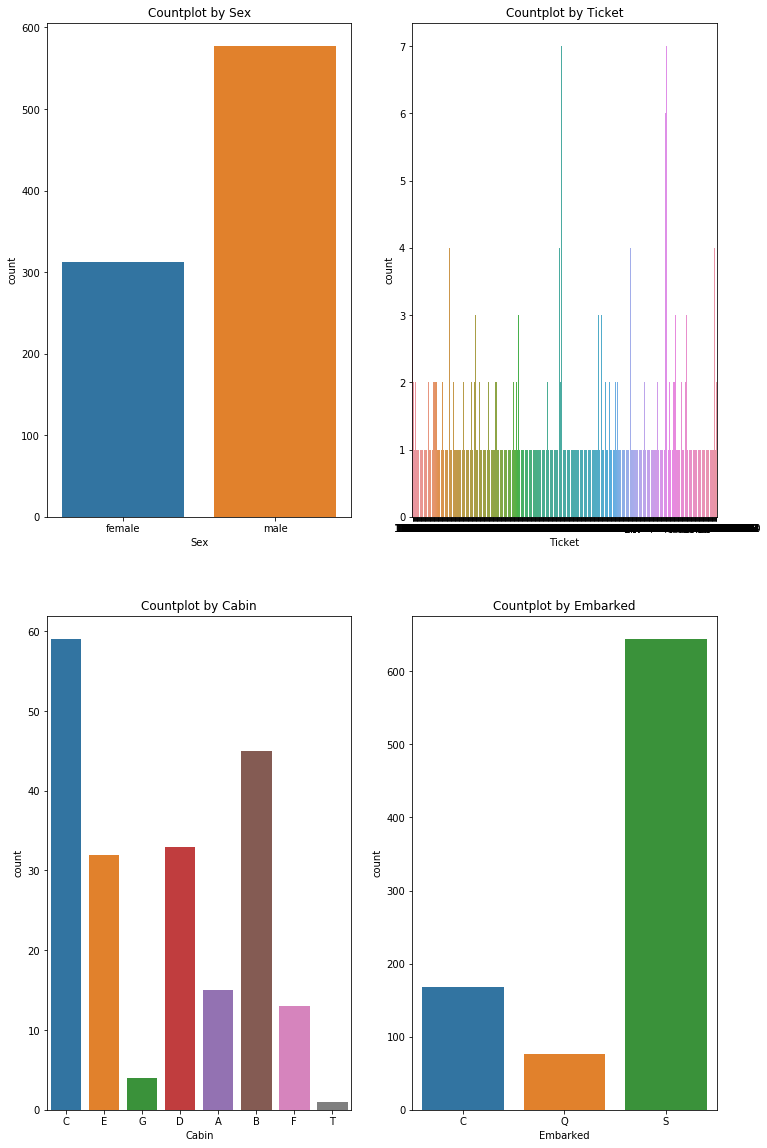

In [107]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# category column visualize
fig, axes = plt.subplots(2,2, figsize=(12,20))
axes = axes.flatten()

for col, ax in zip(cat_col.drop("Name"), axes):
    if col != "Name":
        sns.countplot(data = train_cabin, x=col, ax=ax)
        ax.set_title("Countplot by " + col)